In [1]:
import os
import numpy as np
import nibabel as nib
import h5py
from utils.utils_image import load_image
from utils.utils_plot import viz_slices, viz_multiple_images
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import nibabel as nib


In [37]:
base_paths = []
base_paths.append("/dtu/3d-imaging-center/projects/2025_DANFIX_163_VoDaSuRe/raw_data_extern/stitched/processed/Bamboo_A_bin1x1")
base_paths.append("/dtu/3d-imaging-center/projects/2025_DANFIX_163_VoDaSuRe/raw_data_extern/stitched/processed/Cypress_A_bin1x1")
base_paths.append("/dtu/3d-imaging-center/projects/2025_DANFIX_163_VoDaSuRe/raw_data_extern/stitched/processed/Cardboard_A_bin1x1")
base_paths.append("/dtu/3d-imaging-center/projects/2025_DANFIX_163_VoDaSuRe/raw_data_extern/stitched/processed/MDF_A_bin1x1")
base_paths.append("/dtu/3d-imaging-center/projects/2025_DANFIX_163_VoDaSuRe/raw_data_extern/stitched/processed/Elm_A_bin1x1")
base_paths.append("/dtu/3d-imaging-center/projects/2025_DANFIX_163_VoDaSuRe/raw_data_extern/stitched/processed/Ox_bone_A_bin1x1")

base_paths.append("/work2/aulho/processed/Oak_A_bin1x1/")
base_paths.append("/work2/aulho/processed/Larch_B_bin1x1/")
base_paths.append("/work2/aulho/Vertebrae_A_80kV/processed")
base_paths.append("/work2/aulho/Vertebrae_B_80kV/processed")
base_paths.append("/work2/aulho/Vertebrae_C_80kV/processed")
base_paths.append("/work2/aulho/Vertebrae_D_80kV/processed")
base_paths.append("/work2/aulho/Femur_01_80kV/processed")
base_paths.append("/work2/aulho/Femur_15_80kV/processed")
base_paths.append("/work2/aulho/Femur_21_80kV/processed")
base_paths.append("/work2/aulho/Femur_74_80kV/processed")

for path in base_paths:
    image_path = os.path.join(path, "fixed_scale_1.nii.gz")
    nifti_data = nib.load(image_path)

    print(f"Sample: {path}, shape: {nifti_data.shape}")
    #print(np.array(nifti_data.shape) / 4)
    trim_slices = [(np.array(nifti_data.shape) % 160) / scale for scale in [1, 2, 4, 8]]
    
    print("Slices to trim:", trim_slices)
    #print("HR slices to trim:", (np.array(nifti_data.shape) % 160))
    #print("REG slices to trim:", (np.array(nifti_data.shape) % 160) / 4)




Sample: /dtu/3d-imaging-center/projects/2025_DANFIX_163_VoDaSuRe/raw_data_extern/stitched/processed/Bamboo_A_bin1x1, shape: (5460, 1920, 1920)
Slices to trim: [array([20.,  0.,  0.]), array([10.,  0.,  0.]), array([5., 0., 0.]), array([2.5, 0. , 0. ])]
Sample: /dtu/3d-imaging-center/projects/2025_DANFIX_163_VoDaSuRe/raw_data_extern/stitched/processed/Cypress_A_bin1x1, shape: (5456, 1920, 1920)
Slices to trim: [array([16.,  0.,  0.]), array([8., 0., 0.]), array([4., 0., 0.]), array([2., 0., 0.])]
Sample: /dtu/3d-imaging-center/projects/2025_DANFIX_163_VoDaSuRe/raw_data_extern/stitched/processed/Cardboard_A_bin1x1, shape: (5144, 1920, 1920)
Slices to trim: [array([24.,  0.,  0.]), array([12.,  0.,  0.]), array([6., 0., 0.]), array([3., 0., 0.])]
Sample: /dtu/3d-imaging-center/projects/2025_DANFIX_163_VoDaSuRe/raw_data_extern/stitched/processed/MDF_A_bin1x1, shape: (3724, 1920, 1920)
Slices to trim: [array([44.,  0.,  0.]), array([22.,  0.,  0.]), array([11.,  0.,  0.]), array([5.5, 0. , 

In [51]:

base_path = "/work2/aulho/processed/bone_2_cropped/"

HR_path = os.path.join(base_path, "bone_2_bin1x1_crop.h5")
LR_path = os.path.join(base_path, "bone_2_registered_HR.nii.gz")


In [52]:

img_HR = load_image(HR_path, dataset_name='/exchange/data')


HDF5 shape: (D=2585, H=10240, W=10240)


In [53]:

img_LR = load_image(LR_path) 


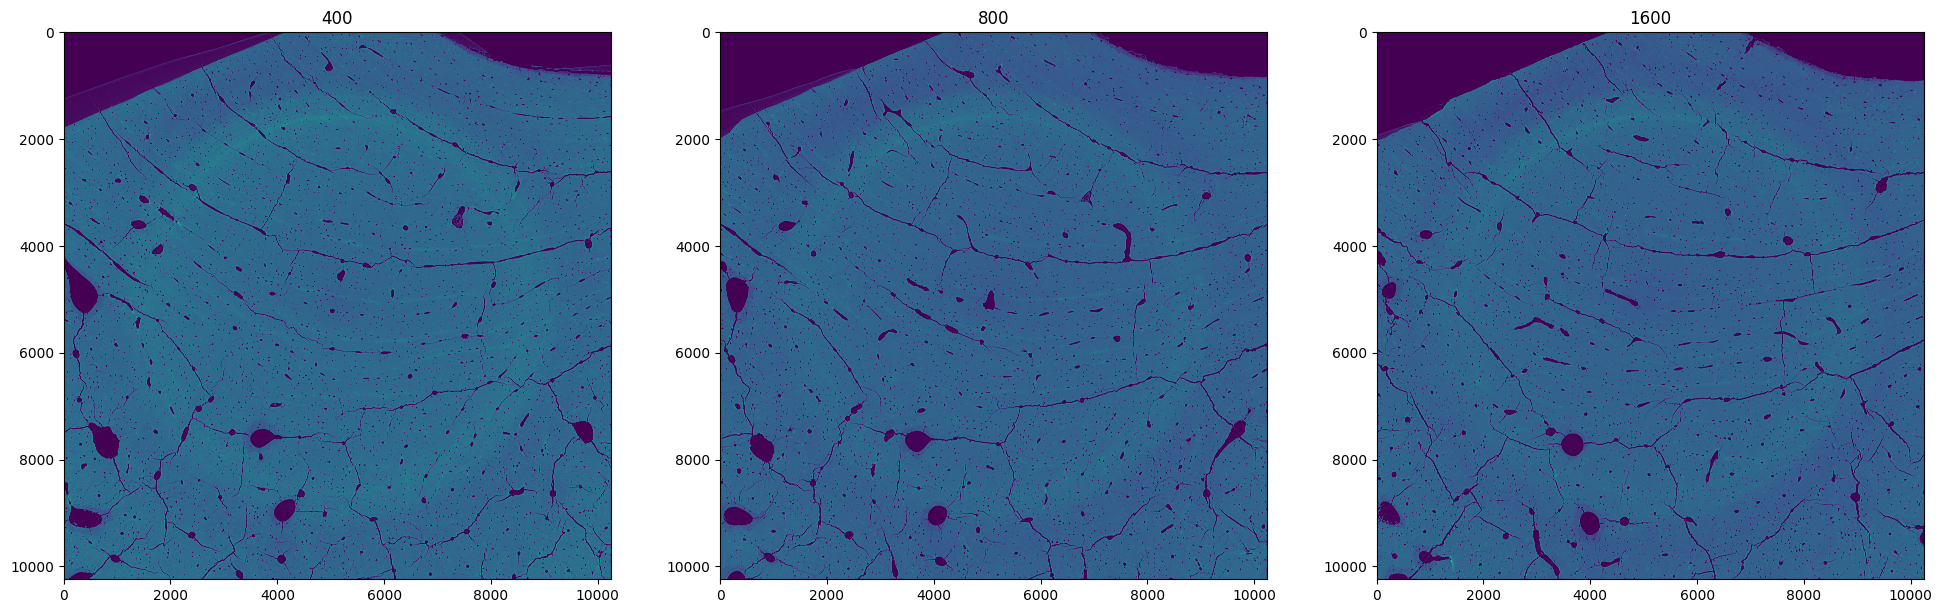

In [54]:

viz_slices(img_HR, [400, 800, 1600], savefig=False)


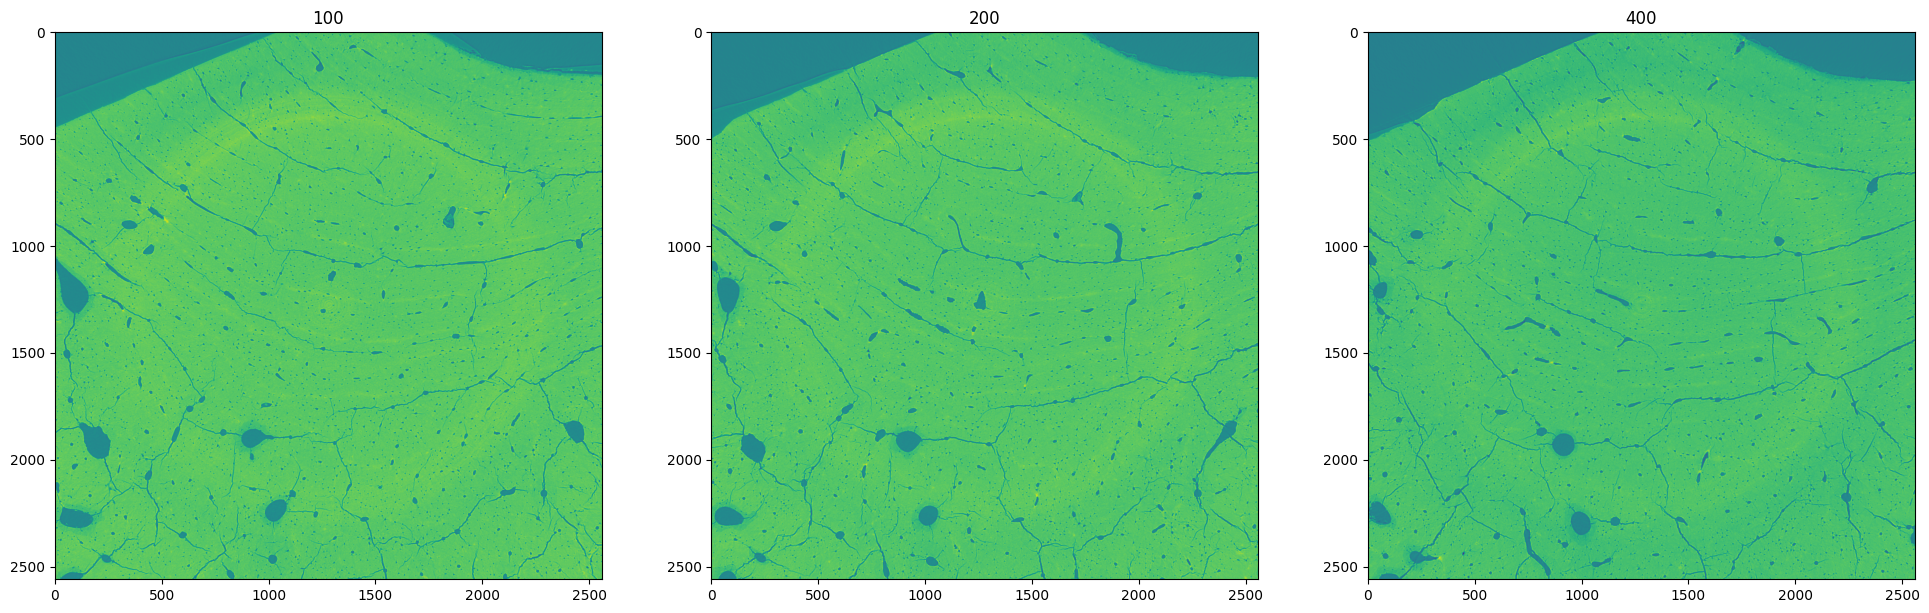

In [55]:

viz_slices(img_LR, [100, 200, 400], savefig=False)


(1240, 1240) (310, 310)


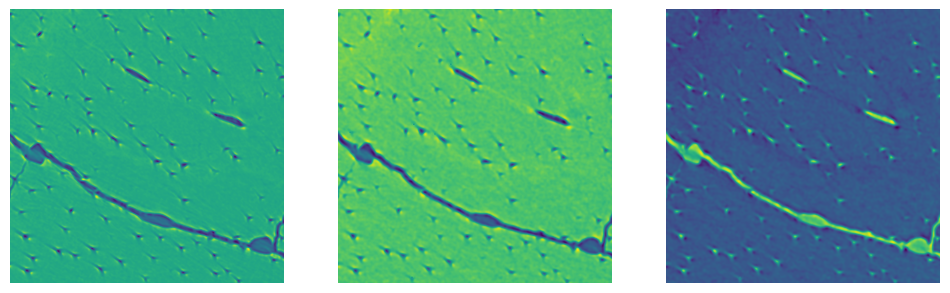

In [56]:

slice_index_hr = 1300
slice_index_lr = slice_index_hr // 4 

start_roi_hr = np.array([2500, 2500])
end_roi_hr = np.array([-6500, -6500])

start_roi_lr = start_roi_hr // 4
end_roi_lr = end_roi_hr // 4

slice_HR = img_HR[slice_index_hr, start_roi_hr[0]:end_roi_hr[0], start_roi_hr[1]:end_roi_hr[1]]
slice_LR = img_LR[slice_index_lr, start_roi_lr[0]:end_roi_lr[0], start_roi_lr[1]:end_roi_lr[1]]
print(slice_HR.shape, slice_LR.shape)

slice_LR_up = F.interpolate(torch.Tensor(slice_LR).unsqueeze(0).unsqueeze(0), scale_factor=4, mode='bilinear').squeeze().numpy()
slice_diff = slice_HR - slice_LR_up

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(slice_HR)
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(slice_LR)
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(slice_diff)
plt.axis("off")
plt.show()